In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
from sklearn.datasets import load_diabetes

In [9]:
dataset=load_diabetes()

In [10]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [11]:
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [13]:
x=pd.DataFrame(dataset.data,columns=['age',
  'sex',
  'bmi',
  'bp',
  's1',
  's2',
  's3',
  's4',
  's5',
  's6'],)

In [15]:
y=dataset['target']

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [18]:
x_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.136522,0.181976,0.308406,0.261534,0.200301,-0.023100,0.165340,0.270981,0.262201
sex,0.136522,1.000000,0.044746,0.165128,0.033717,0.128023,-0.344052,0.320619,0.121299,0.159936
bmi,0.181976,0.044746,1.000000,0.384534,0.246802,0.255519,-0.372335,0.431946,0.448657,0.394699
bp,0.308406,0.165128,0.384534,1.000000,0.242052,0.164355,-0.113747,0.209316,0.362476,0.376421
s1,0.261534,0.033717,0.246802,0.242052,1.000000,0.891476,0.044128,0.556987,0.528922,0.323666
s2,0.200301,0.128023,0.255519,0.164355,0.891476,1.000000,-0.190767,0.653120,0.307541,0.298647
s3,-0.023100,-0.344052,-0.372335,-0.113747,0.044128,-0.190767,1.000000,-0.732862,-0.388778,-0.304091
s4,0.165340,0.320619,0.431946,0.209316,0.556987,0.653120,-0.732862,1.000000,0.629707,0.441489
s5,0.270981,0.121299,0.448657,0.362476,0.528922,0.307541,-0.388778,0.629707,1.000000,0.464878
s6,0.262201,0.159936,0.394699,0.376421,0.323666,0.298647,-0.304091,0.441489,0.464878,1.000000


<Axes: >

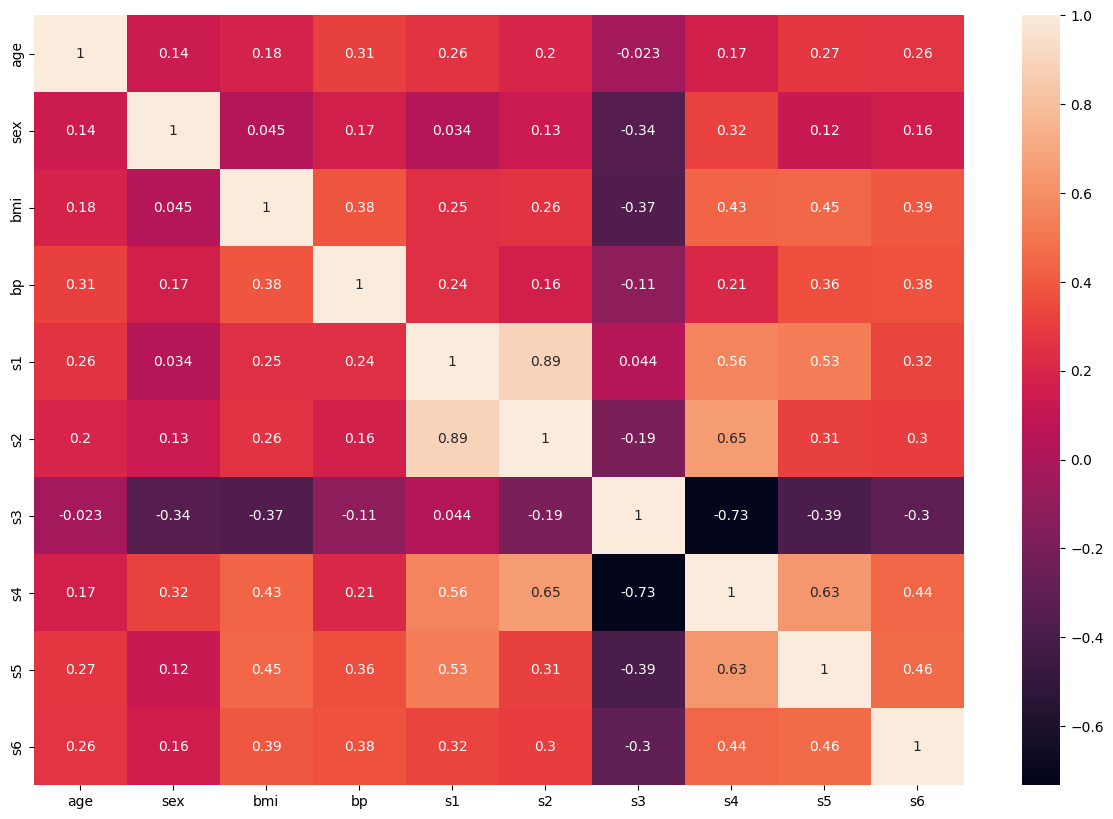

In [19]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(x_train.corr(),annot=True)

In [20]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


# hyperparameter tuning

In [30]:
#defining params for gridsearchcv
params={'criterion' : ["squared_error", "friedman_mse", "absolute_error","poisson"],
    'splitter' : ["best", "random"],
    'max_depth':[1,2,3,4,5,10,20,25],
    'max_features' :["sqrt", "log2",'auto']
       }

In [31]:
from sklearn.model_selection import GridSearchCV
model=DecisionTreeRegressor()

In [32]:
grid=GridSearchCV(estimator=model,
    param_grid=params,
    scoring='neg_mean_squared_error',
    cv=5,
   )

In [34]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(x_train,y_train)

,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['squared_error', 'friedman_mse', ...], 'max_depth': [1, 2, ...], 'max_features': ['sqrt', 'log2', ...], 'splitter': ['best', 'random']}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [35]:
grid.best_score_

-4066.916983606726

In [36]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [37]:
##prediction
y_pred=grid.predict(x_test)

In [38]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.20261997926559072
51.58198311323547
4304.502755103316


#visulaizing the best model

In [42]:
selected_model=DecisionTreeRegressor(criterion='squared_error',
 max_depth= 4,
 max_features='log2',
 splitter='best')

In [43]:
selected_model.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


[Text(0.5, 0.9, 'x[9] <= 0.026\nsquared_error = 6148.282\nsamples = 309\nvalue = 153.903'),
 Text(0.25, 0.7, 'x[9] <= -0.032\nsquared_error = 4935.661\nsamples = 223\nvalue = 136.951'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[3] <= 0.013\nsquared_error = 3003.665\nsamples = 73\nvalue = 111.247'),
 Text(0.0625, 0.3, 'x[9] <= -0.036\nsquared_error = 2328.1\nsamples = 66\nvalue = 103.742'),
 Text(0.03125, 0.1, 'squared_error = 2274.389\nsamples = 60\nvalue = 108.333'),
 Text(0.09375, 0.1, 'squared_error = 546.806\nsamples = 6\nvalue = 57.833'),
 Text(0.1875, 0.3, 'x[6] <= 0.032\nsquared_error = 3836.286\nsamples = 7\nvalue = 182.0'),
 Text(0.15625, 0.1, 'squared_error = 2186.75\nsamples = 4\nvalue = 212.5'),
 Text(0.21875, 0.1, 'squared_error = 3141.556\nsamples = 3\nvalue = 141.333'),
 Text(0.375, 0.5, 'x[0] <= -0.018\nsquared_error = 5397.875\nsamples = 150\nvalue = 149.46'),
 Text(0.3125, 0.3, 'x[6] <= -0.001\nsquared_error = 5067.62\nsamples = 49\nvalue = 124.633'),
 Text(0.

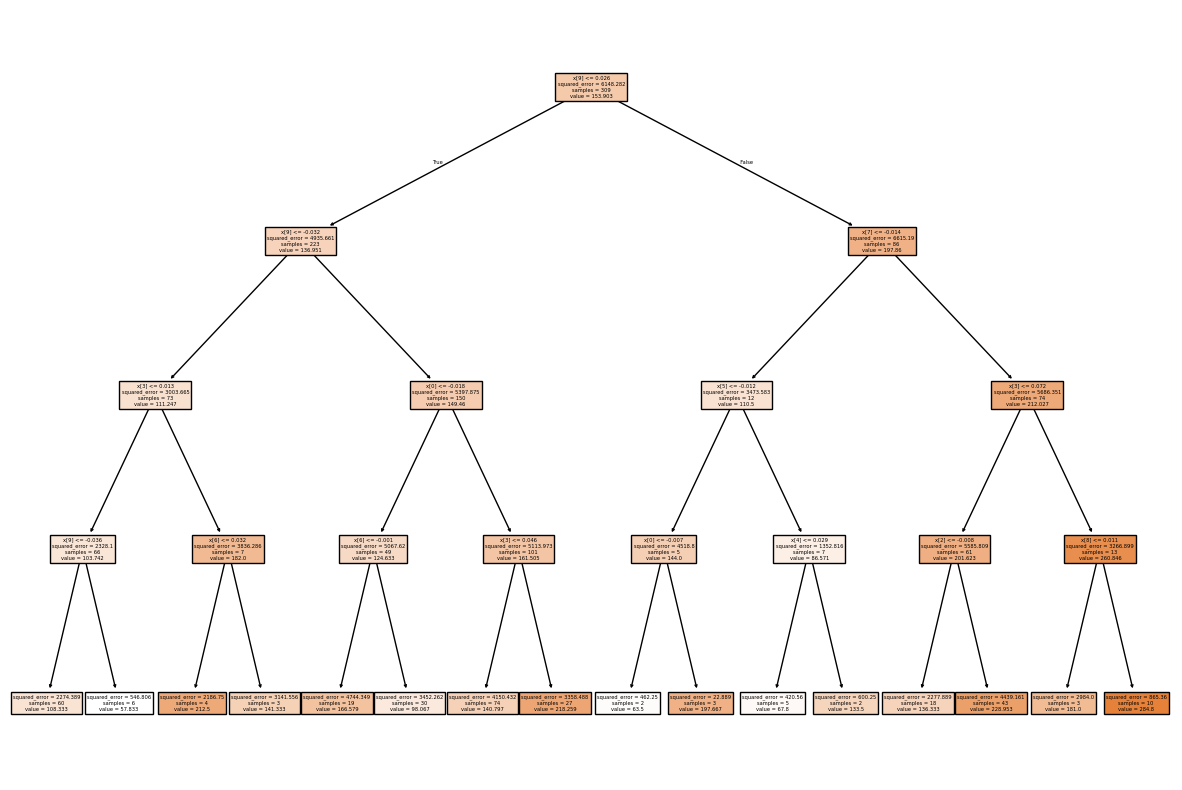

In [44]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(selected_model,filled=True)